In [75]:
import pandas as pd
import os
import shutil
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Tratamento para o caminho do CSV
local_path = os.getcwd()
print(local_path)
dir_path = local_path + '/Data_content'
archive_name= 'sales_data.csv'
archive_path = dir_path + '/' + archive_name
upload_path = local_path + '/' + archive_name

print(dir_path)
if not os.path.exists(dir_path):
    os.mkdir(dir_path)

if not os.path.exists(archive_path):
    if not os.path.exists(upload_path):
      print("Faça upload do arquivo " + archive_name + " para a pasta " + local_path)
    else:
      shutil.move(archive_name, archive_path)
      print("Arquivo movido com sucesso!")
else:
  print(archive_name + " já existe na pasta " + dir_path)

C:\Users\Cibelle Lima\Documents\GitHub\Modelagem_dimensional
C:\Users\Cibelle Lima\Documents\GitHub\Modelagem_dimensional/Data_content
sales_data.csv já existe na pasta C:\Users\Cibelle Lima\Documents\GitHub\Modelagem_dimensional/Data_content


In [42]:
def infos_df(df):
    print(f"Número de linhas: {len(df)}")
    print(f"Número de colunas: {df.shape[1]}")
    print("\nTipos de dados:")
    print(df.dtypes)
    print("\nPrimeiras 5 linhas:")
    display(df.head())

In [43]:
#Infos sobre o DF Sales
df_sales_info = pd.read_csv(archive_path)
print(len(df_sales_info))
infos_df(df_sales_info)

50000
Número de linhas: 50000
Número de colunas: 12

Tipos de dados:
user_name                    object
user_country_name            object
user_city_name               object
product_name                 object
product_description          object
product_brand                object
product_value_in_dolars     float64
store_name                   object
store_country                object
store_city                   object
datetime_of_the_purchase     object
buyed_amount                  int64
dtype: object

Primeiras 5 linhas:


,user_name,user_country_name,user_city_name,product_name,product_description,product_brand,product_value_in_dolars,store_name,store_country,store_city,datetime_of_the_purchase,buyed_amount
0,Mark King,UK,Sheffield,Dryer,Electric dryer with moisture sensor,Samsung,699.99,Waitrose,UK,Brighton,2024-10-18 02:05:28.167653,4
1,Alice Hughes,UK,Bristol,Robot Vacuum,Smart robot vacuum with mapping technology,iRobot,299.99,Supercheap Auto,Australia,Cairns,2024-12-10 17:22:28.167694,2
2,Diana Hughes,UK,Leicester,Monitor,27-inch 144Hz gaming monitor,ASUS,349.99,B&Q,UK,Southampton,2025-01-09 16:15:28.167712,2
3,Diana Hughes,USA,Cleveland,Electric Griddle,Large electric griddle with non-stick surface,Black+Decker,49.99,Lowe's,USA,Fort Worth,2024-10-25 03:02:28.167727,3
4,Timothy Collins,USA,Charlotte,Air Conditioner,Portable air conditioner for cooling,Honeywell,399.99,B&Q,UK,Reading,2024-11-02 11:20:28.167741,1


In [44]:
#Cria as IDs das lojas
df_store_id = df_sales_info['store_name'].drop_duplicates().reset_index(drop=True).to_frame()
df_store_id = df_store_id.sort_values(by='store_name').reset_index(drop=True)
df_store_id['ID_Store'] = df_store_id.index + 1
infos_df(df_store_id)

Número de linhas: 54
Número de colunas: 2

Tipos de dados:
store_name    object
ID_Store       int64
dtype: object

Primeiras 5 linhas:


,store_name,ID_Store
0,ASDA,1
1,Argos,2
2,B&Q,3
3,Best Buy,4
4,Big W,5


In [45]:
#Cria as IDs de usuário
df_user_id = df_sales_info['user_name'].drop_duplicates().reset_index(drop=True).to_frame()
df_user_id = df_user_id.sort_values(by='user_name').reset_index(drop=True)
df_user_id['ID_User'] = df_user_id.index + 1
infos_df(df_user_id)

Número de linhas: 85
Número de colunas: 2

Tipos de dados:
user_name    object
ID_User       int64
dtype: object

Primeiras 5 linhas:


,user_name,ID_User
0,Alice Hughes,1
1,Alice Johnson,2
2,Andrew Carter,3
3,Angela Murphy,4
4,Angela Phillips,5


In [46]:
#Cria as IDs de produtos
df_product_id = df_sales_info['product_name'].drop_duplicates().reset_index(drop=True).to_frame()
df_product_id = df_product_id.sort_values(by='product_name').reset_index(drop=True)
df_product_id['ID_Product'] = df_product_id.index + 1
infos_df(df_product_id)

Número de linhas: 85
Número de colunas: 2

Tipos de dados:
product_name    object
ID_Product       int64
dtype: object

Primeiras 5 linhas:


,product_name,ID_Product
0,Action Camera,1
1,Air Conditioner,2
2,Air Purifier,3
3,Baking Sheet,4
4,Basting Brush,5


In [47]:
#Cria as IDs de marcas
df_brand_id = df_sales_info['product_brand'].drop_duplicates().reset_index(drop=True).to_frame()
df_brand_id = df_brand_id.sort_values(by='product_brand').reset_index(drop=True)
df_brand_id['ID_Brand'] = df_brand_id.index + 1
infos_df(df_brand_id)

Número de linhas: 64
Número de colunas: 2

Tipos de dados:
product_brand    object
ID_Brand          int64
dtype: object

Primeiras 5 linhas:


,product_brand,ID_Brand
0,ASUS,1
1,Amazon,2
2,AmazonBasics,3
3,Anova,4
4,Apple,5


In [48]:
#Cria as IDs de país
df_country_id = df_sales_info['user_country_name'].drop_duplicates().reset_index(drop=True).to_frame()
df_country_id = df_country_id.sort_values(by='user_country_name').reset_index(drop=True)
df_country_id['ID_Country'] = df_country_id.index + 1
df_country_id = df_country_id.rename(columns={'user_country_name': 'Country_name'})
df_country_id.head()
infos_df(df_country_id)

Número de linhas: 4
Número de colunas: 2

Tipos de dados:
Country_name    object
ID_Country       int64
dtype: object

Primeiras 5 linhas:


,Country_name,ID_Country
0,Australia,1
1,Canada,2
2,UK,3
3,USA,4


In [49]:
#Cria as IDs de Cidades
df_local_id = df_sales_info.groupby(['user_country_name', 'user_city_name']).size().reset_index()
df_local_id['ID'] = df_local_id.index + 1
df_local_id = df_local_id.rename(columns={'ID': 'ID_City', 'user_country_name': 'Country_name', 'user_city_name': 'City_name'}).drop(columns=[0])
df_local_id.head()

,Country_name,City_name,ID_City
0,Australia,Adelaide,1
1,Australia,Ballarat,2
2,Australia,Brisbane,3
3,Australia,Cairns,4
4,Australia,Canberra,5


In [50]:
#DF de local completo com cidade e país
df_local_id = df_local_id.merge(df_country_id, on='Country_name')
df_local_id = df_local_id[['Country_name', 'ID_Country', 'City_name', 'ID_City']]
infos_df(df_local_id)

Número de linhas: 91
Número de colunas: 4

Tipos de dados:
Country_name    object
ID_Country       int64
City_name       object
ID_City          int64
dtype: object

Primeiras 5 linhas:


,Country_name,ID_Country,City_name,ID_City
0,Australia,1,Adelaide,1
1,Australia,1,Ballarat,2
2,Australia,1,Brisbane,3
3,Australia,1,Cairns,4
4,Australia,1,Canberra,5


In [78]:
geoloc = Nominatim(user_agent="geoapi")

def coordenadas_lat_long(city, country):
    try:
        coordenadas = geoloc.geocode(f"{city}, {country}", timeout=10)
        if coordenadas:
            return pd.Series([coordenadas.latitude, coordenadas.longitude])
        else:
            return pd.Series([None, None])
    except GeocoderTimedOut:
        return pd.Series([None, None])

df_local = df_local_id
df_local[['latitude', 'longitude']] = df_local.apply(lambda x: coordenadas_lat_long(x['City_name'], x['Country_name']), axis=1)

,Country_name,ID_Country,City_name,ID_City,latitude,longitude
0,Australia,1,Adelaide,1,-34.928181,138.599931
1,Australia,1,Ballarat,2,-37.562301,143.860565
2,Australia,1,Brisbane,3,-27.468968,153.023499
3,Australia,1,Cairns,4,-16.920666,145.772185
4,Australia,1,Canberra,5,-35.297591,149.101268


In [52]:
#Fact Table sales
df_sales = df_sales_info.merge(df_store_id, on=['store_name'])
df_sales = df_sales.merge(df_user_id, on=['user_name'])
df_sales = df_sales.merge(df_product_id, on=['product_name'])
df_sales = df_sales.merge(df_country_id, left_on=['store_country'], right_on=['Country_name'])
df_sales = df_sales[['ID_User', 'ID_Product', 'ID_Store', 'ID_Country', 'buyed_amount', 'datetime_of_the_purchase']].sort_values(by='datetime_of_the_purchase').reset_index(drop=True)
infos_df(df_sales)

Número de linhas: 50000
Número de colunas: 6

Tipos de dados:
ID_User                      int64
ID_Product                   int64
ID_Store                     int64
ID_Country                   int64
buyed_amount                 int64
datetime_of_the_purchase    object
dtype: object

Primeiras 5 linhas:


,ID_User,ID_Product,ID_Store,ID_Country,buyed_amount,datetime_of_the_purchase
0,50,18,30,4,4,2024-10-14 12:03:28.184579
1,64,22,9,2,1,2024-10-14 12:04:28.321426
2,6,4,2,3,5,2024-10-14 12:27:28.382694
3,59,16,40,2,3,2024-10-14 12:32:28.331652
4,34,3,43,2,3,2024-10-14 12:37:28.301934


In [53]:
#Dimension Table Product
df_product = df_sales_info.groupby(['product_name', 'product_brand']).size().reset_index()
df_product = df_product.merge(df_sales_info[['product_name', 'product_description', 'product_value_in_dolars']], on=['product_name'])
df_product = df_product.merge(df_product_id, on=['product_name'])
df_product = df_product.drop(columns=[0])
df_product = df_product.drop_duplicates()
df_product = df_product[['ID_Product', 'product_name', 'product_brand', 'product_description', 'product_value_in_dolars']]
infos_df(df_product)

Número de linhas: 85
Número de colunas: 5

Tipos de dados:
ID_Product                   int64
product_name                object
product_brand               object
product_description         object
product_value_in_dolars    float64
dtype: object

Primeiras 5 linhas:


,ID_Product,product_name,product_brand,product_description,product_value_in_dolars
0,1,Action Camera,GoPro,Compact action camera for adventure sports,399.99
590,2,Air Conditioner,Honeywell,Portable air conditioner for cooling,399.99
1226,3,Air Purifier,Dyson,HEPA air purifier for home use,499.99
1829,4,Baking Sheet,Nordic Ware,Non-stick baking sheet for cookies,19.99
2430,5,Basting Brush,Silicone Zone,Silicone basting brush for grilling,9.99


In [54]:
#Dimension Table Stores
df_stores = df_sales_info.groupby(['store_name', 'store_country', 'store_city']).size().reset_index()
df_stores = df_stores.merge(df_store_id, on=['store_name'])
df_stores = df_stores.drop(columns=[0])
df_stores = df_stores.merge(df_local_id, left_on=['store_city'], right_on=['City_name'])
df_stores = df_stores[['ID_Store', 'store_name', 'ID_Country', 'ID_City']]
infos_df(df_stores)

Número de linhas: 67
Número de colunas: 4

Tipos de dados:
ID_Store       int64
store_name    object
ID_Country     int64
ID_City        int64
dtype: object

Primeiras 5 linhas:


,ID_Store,store_name,ID_Country,ID_City
0,1,ASDA,3,56
1,2,Argos,3,47
2,2,Argos,2,28
3,2,Argos,3,52
4,3,B&Q,3,43


In [55]:
#Dimension table users
df_user = df_sales_info.groupby(['user_name', 'user_country_name', 'user_city_name']).size().reset_index()
df_user = df_user.merge(df_user_id, on=['user_name'])
df_user = df_user.merge(df_local_id, left_on=['user_country_name', 'user_city_name'], right_on=['Country_name', 'City_name'])
df_user = df_user.drop(columns=[0])
df_user = df_user.drop_duplicates()
df_user = df_user[['ID_User', 'user_name', 'ID_Country', 'ID_City']]
df_user.head()

,ID_User,user_name,ID_Country,ID_City
0,1,Alice Hughes,1,4
1,1,Alice Hughes,1,19
2,1,Alice Hughes,2,29
3,1,Alice Hughes,2,33
4,1,Alice Hughes,3,45


# Quais foram os países com maior número de vendas ?

In [56]:
max_sales_per_country = df_sales.groupby(['ID_Country'])['buyed_amount'].sum().reset_index()
max_sales_per_country = max_sales_per_country.merge(df_country_id[['ID_Country', 'Country_name']], on=['ID_Country']).sort_values(by='buyed_amount', ascending=False)
max_sales_per_country = max_sales_per_country.rename(columns={'buyed_amount': 'total_sales'}).reset_index(drop=True)
max_sales_per_country = max_sales_per_country[['ID_Country', 'Country_name', 'total_sales']]
max_sales_per_country

,ID_Country,Country_name,total_sales
0,2,Canada,39104
1,1,Australia,37422
2,4,USA,36699
3,3,UK,36467


# Quais países tem mais lojas ?

In [57]:
max_stores_per_country = df_stores.groupby(['ID_Country'])['ID_Store'].count().reset_index()
max_stores_per_country = max_stores_per_country.merge(df_country_id[['ID_Country', 'Country_name']], on=['ID_Country']).sort_values(by='ID_Store', ascending=False)
max_stores_per_country = max_stores_per_country.rename(columns={'ID_Store': 'Stores'}).reset_index(drop=True)
max_stores_per_country = max_stores_per_country[['ID_Country', 'Country_name', 'Stores']]
max_stores_per_country

,ID_Country,Country_name,Stores
0,3,UK,18
1,1,Australia,17
2,4,USA,17
3,2,Canada,15


# Quais países tiveram o maior valor total bruto de vendas ?


In [58]:
max_value_per_country = df_sales.groupby(['ID_Country', 'ID_Product'])['buyed_amount'].sum().reset_index()
max_value_per_country = max_value_per_country.merge(df_product[['ID_Product', 'product_value_in_dolars']], on=['ID_Product'])
max_value_per_country['Total_value'] = max_value_per_country['buyed_amount'] * max_value_per_country['product_value_in_dolars']
max_value_per_country = max_value_per_country.groupby(['ID_Country'])['Total_value'].sum().reset_index()
max_value_per_country = max_value_per_country.merge(df_country_id[['ID_Country', 'Country_name']], on=['ID_Country']).sort_values(by='Total_value', ascending=False)
max_value_per_country = max_value_per_country[['ID_Country', 'Country_name', 'Total_value']]
max_value_per_country

,ID_Country,Country_name,Total_value
1,2,Canada,7246033.97
0,1,Australia,6896470.25
3,4,USA,6860512.98
2,3,UK,6808784.10


# Quais são as maiores lojas em número de vendas de cada país ?

In [59]:
max_sales_per_store = df_sales.groupby(['ID_Store', 'ID_Country'])['buyed_amount'].sum().reset_index()
idx = max_sales_per_store.groupby('ID_Country')['buyed_amount'].idxmax()
top_sales_per_country = max_sales_per_store.loc[idx].reset_index(drop=True)
top_sales_per_country = top_sales_per_country.merge(df_stores[['ID_Store', 'store_name']], on=['ID_Store'])
top_sales_per_country = top_sales_per_country.merge(df_country_id[['ID_Country', 'Country_name']], on=['ID_Country'])
top_sales_per_country = top_sales_per_country[['Country_name', 'store_name', 'buyed_amount']].sort_values(by='buyed_amount', ascending=False)
top_sales_per_country = top_sales_per_country.rename(columns={'buyed_amount': 'total_sales'}).drop_duplicates()
top_sales_per_country

,Country_name,store_name,total_sales
5,UK,B&Q,6650
3,Canada,Canadian Tire,6540
6,USA,Sears,4408
0,Australia,Officeworks,4365


# Quais foram as lojas com maior valor bruto de venda ?

In [60]:
max_value_per_store = df_sales.groupby(['ID_Store', 'ID_Product', 'ID_Country'])['buyed_amount'].sum().reset_index()
max_value_per_store = max_value_per_store.merge(df_product[['ID_Product', 'product_value_in_dolars']], on=['ID_Product'])
max_value_per_store['Total_value'] = max_value_per_store['buyed_amount'] * max_value_per_store['product_value_in_dolars']
max_value_per_store = max_value_per_store.groupby(['ID_Store', 'ID_Country'])['Total_value'].sum().reset_index()
idx = max_value_per_store.groupby('ID_Country')['Total_value'].idxmax()
max_value_per_store = max_value_per_store.loc[idx].reset_index(drop=True)

In [61]:
max_value_per_store = max_value_per_store.merge(df_stores[['ID_Store', 'store_name']], on=['ID_Store'])
max_value_per_store = max_value_per_store.merge(df_country_id[['ID_Country', 'Country_name']], on=['ID_Country'])
max_value_per_store = max_value_per_store[['store_name', 'Country_name', 'Total_value']].sort_values(by='Total_value', ascending=False)
max_value_per_store = max_value_per_store.drop_duplicates()
max_value_per_store

,store_name,Country_name,Total_value
3,Canadian Tire,Canada,1255490.58
5,B&Q,UK,1231429.16
6,Fry's Electronics,USA,839137.02
0,Kmart,Australia,796322.12


# Visualização de Faturamento por loja

In [62]:
max_value_per_store_new = df_sales.groupby(['ID_Store', 'ID_Product', 'ID_Country'])['buyed_amount'].sum().reset_index()
max_value_per_store_new = max_value_per_store_new.merge(df_product[['ID_Product', 'product_value_in_dolars']], on=['ID_Product'])
max_value_per_store_new['Total_value'] = max_value_per_store_new['buyed_amount'] * max_value_per_store_new['product_value_in_dolars']
max_value_per_store_new = max_value_per_store_new.groupby(['ID_Store', 'ID_Country'])['Total_value'].sum().reset_index()
max_value_per_store_new = max_value_per_store_new.merge(df_stores[['ID_Store', 'store_name']], on=['ID_Store'])
max_value_per_store_new = max_value_per_store_new.merge(df_country_id[['ID_Country', 'Country_name']], on=['ID_Country'])
max_value_per_store_new = max_value_per_store_new[['store_name', 'Country_name', 'Total_value']].sort_values(by='Total_value', ascending=False)
max_value_per_store_new = max_value_per_store_new.drop_duplicates()

In [63]:
top_sales_per_country_values = top_sales_per_country.merge(max_value_per_store_new, on=['store_name', 'Country_name'])
top_sales_per_country_values

,Country_name,store_name,total_sales,Total_value
0,UK,B&Q,6650,1231429.16
1,Canada,Canadian Tire,6540,1255490.58
2,USA,Sears,4408,819131.62
3,Australia,Officeworks,4365,783131.99


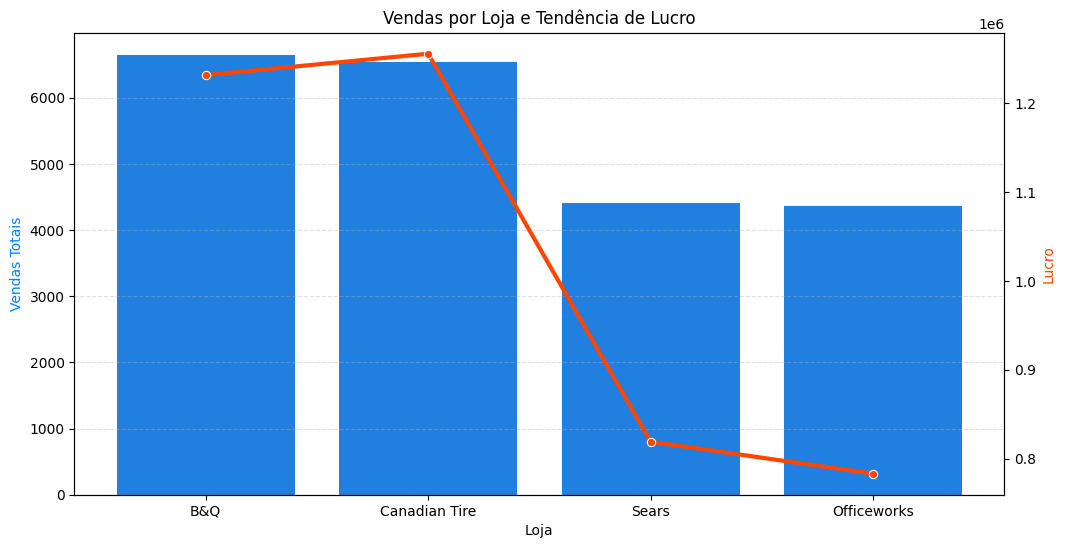

In [65]:
#Grafico de tendências Vendas x Total de lucro top 4 por país (vendas)
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_sales_per_country_values, x='store_name', y='total_sales', color='#007FFF', ax=ax1)

ax2 = ax1.twinx()

sns.lineplot(data=top_sales_per_country_values, x='store_name', y='Total_value', color='#FF4500', marker='o', linewidth=3, ax=ax2)
ax1.set_xlabel('Loja')
ax1.set_ylabel('Vendas Totais', color='#007FFF')
ax2.set_ylabel('Lucro', color='#FF4500')

ax1.set_title('Vendas por Loja e Tendência de Lucro')

ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax2.grid(False)

plt.xticks(rotation=45, ha='right')

plt.savefig(dir_path + "/grafico_vendas.png", dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()


In [80]:
#Salva os DFs em parquet
df_sales.to_parquet(dir_path + '/df_sales.parquet', index=False)
df_product.to_parquet(dir_path + '/df_product.parquet', index=False)
df_stores.to_parquet(dir_path + '/df_stores.parquet', index=False)
df_user.to_parquet(dir_path + '/df_user.parquet', index=False)
df_local.to_parquet(dir_path + '/df_local.parquet', index=False)